In [433]:
import pandas as pd
import numpy as np

In [434]:
df = pd.read_csv('laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [436]:
print('Duplicated sum values:', df.duplicated().sum(), '\n')
print('Missing sum values:')
print(df.isnull().sum())

Duplicated sum values: 0 

Missing sum values:
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


### Preprocessing

Removing 'unnamed' column name

In [437]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [438]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


Removing term 'kg' and 'GB from Weight and RAM column items respectively

In [439]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [440]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [441]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [442]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
dtype: object

In [443]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Price', ylabel='Density'>

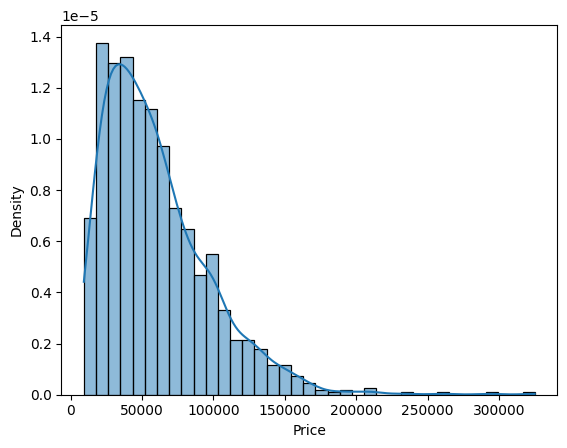

In [444]:
sns.histplot(df['Price'], kde=True, stat='density')

<Axes: xlabel='Company'>

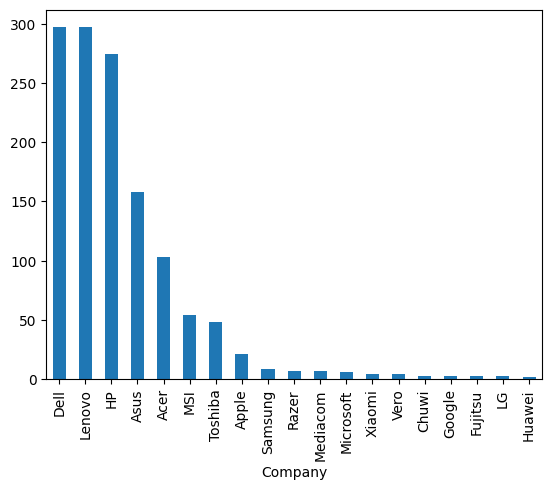

In [445]:
df['Company'].value_counts().plot(kind='bar')

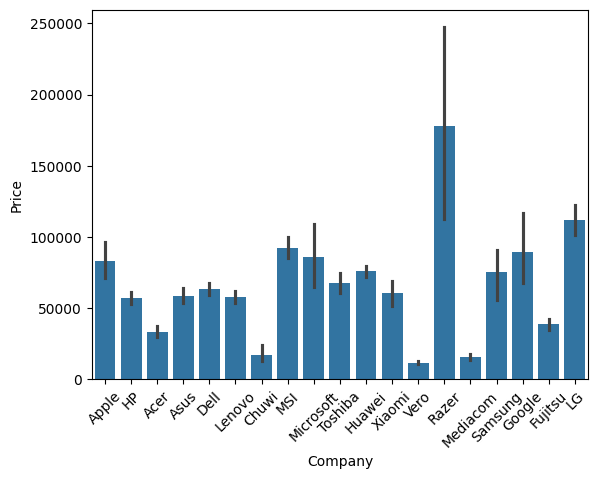

In [446]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='TypeName'>

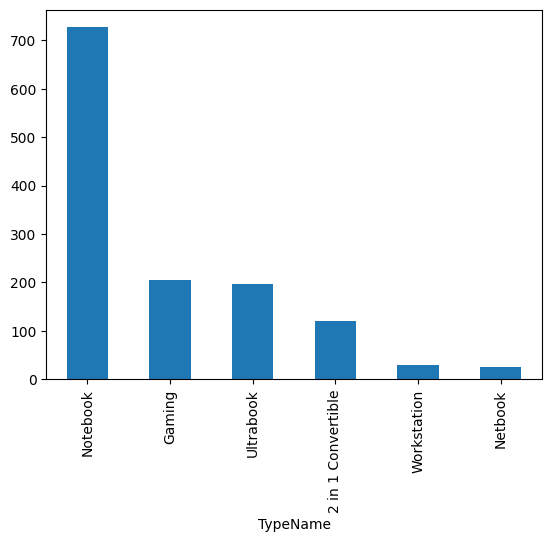

In [447]:

df['TypeName'].value_counts().plot(kind='bar')

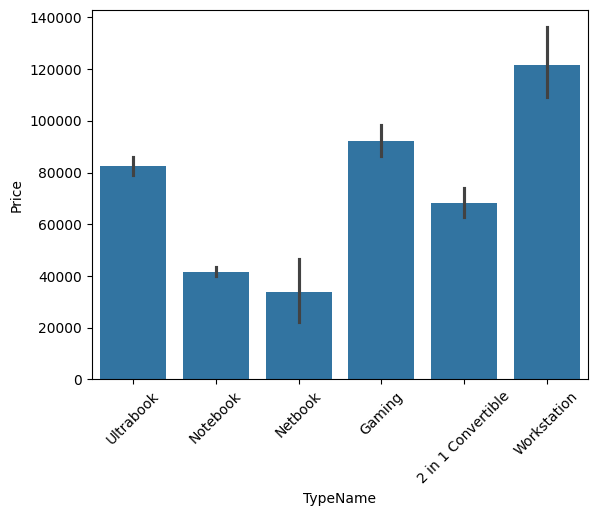

In [448]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Inches', ylabel='Density'>

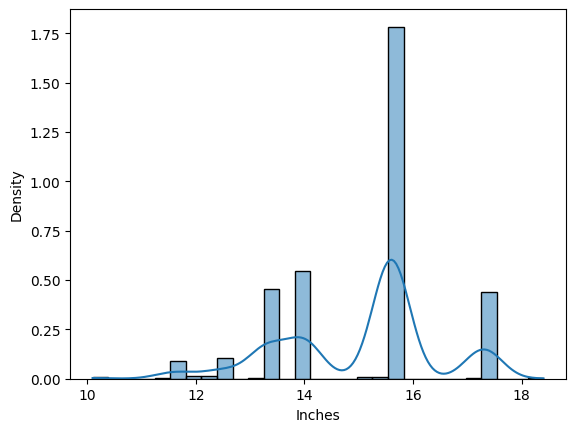

In [449]:
sns.histplot(df['Inches'], kde=True, stat='density')

<Axes: xlabel='Inches', ylabel='Price'>

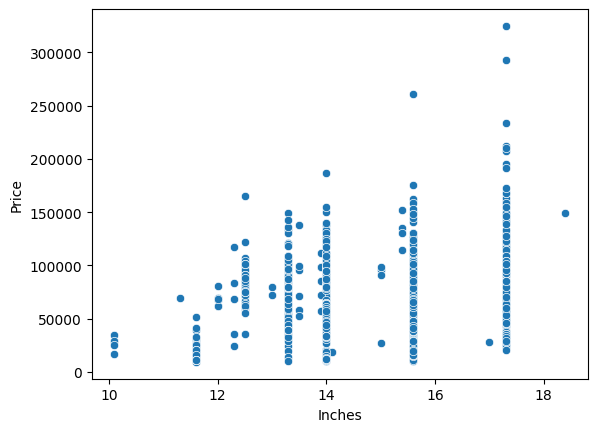

In [450]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

In [451]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

Terms to focus on: Touchscreen

In [452]:
df['Touchscreen'] = df['ScreenResolution'].apply(
    lambda x: 1 if 'Touchscreen' in x else 0)

In [453]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
869,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia Quadro M620,Windows 10,2.23,94731.8400,0
1008,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64,55904.5728,0
496,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.17,47893.3920,0
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,77202.7200,0
1179,HP,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.07,34632.0000,0


<Axes: xlabel='Touchscreen'>

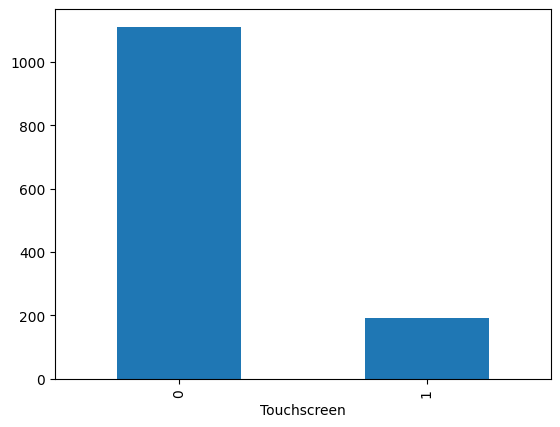

In [454]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

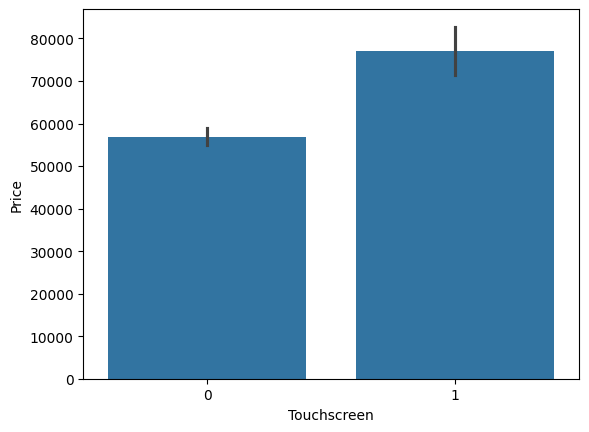

In [455]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])

In [456]:
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [457]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
887,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,72988.272,0,0
111,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,73473.120,1,0
943,Toshiba,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.20,59620.320,0,0


<Axes: xlabel='Ips', ylabel='Price'>

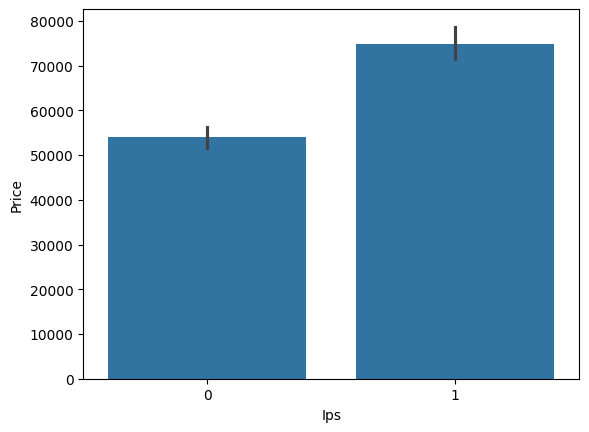

In [458]:
sns.barplot(x=df['Ips'], y=df['Price'])

In [459]:
SplitResolution = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [460]:
df['X_res'] = SplitResolution[0]
df['Y_res'] = SplitResolution[1]

In [461]:
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
896,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050Ti,Linux,2.62,49497.12,0,0,Full HD 1920,1080
370,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26,58554.72,1,0,Full HD / Touchscreen 1920,1080
923,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,16,256GB SSD,Nvidia GeForce 930M,Windows 10,2.40,105228.00,0,1,IPS Panel Full HD 1920,1080
290,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2,16GB SSD,Intel HD Graphics,Chrome OS,2.19,10602.72,0,0,1366,768


In [462]:
df['X_res'] = df['X_res'].str.replace(',', '').str.findall(
    r'(\d+\.?\d+)').apply(lambda x: x[0])

In [463]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080


In [464]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
Touchscreen           int64
Ips                   int64
X_res                object
Y_res                object
dtype: object

In [465]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [466]:
df['Price'].dtypes

dtype('float64')

In [467]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [468]:
# Calculating PPI(Pixel Per Inch) after seeing strong coorelations among X-res and Y-res
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))
             ** 0.5/df['Inches']).astype(float)

In [469]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [470]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [471]:
df.drop(columns=['Inches', 'X_res', 'Y_res'], inplace=True)

In [472]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998


In [473]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

Making Cpu Categories
- Intel Core i3
- Intel Core i5 
- Intel Core i7 
- AMD Chips
- Others (Intel Celeron, Pentium, Atom, Xeon, etc)

In [474]:
 df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [475]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
282,Lenovo,Gaming,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,44169.1200,0,1,141.211998,Intel Core i5
194,Dell,2 in 1 Convertible,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,1.62,44701.9200,1,1,165.632118,Intel Core i7
920,Dell,Notebook,Intel Core i5 7200U 2.5GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18,36496.2672,0,0,100.454670,Intel Core i5


In [476]:
def fetch_processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [477]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [478]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand
964,HP,Notebook,Intel Core i5 7200U 2.50GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,45101.52,0,0,100.454670,Intel Core i5,Intel Core i5
877,Xiaomi,Ultrabook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.28,49816.80,0,1,165.632118,Intel Core i5,Intel Core i5
81,Apple,Ultrabook,Intel Core i5 1.3GHz,8,512GB SSD,Intel HD Graphics 615,macOS,0.92,80452.80,0,1,226.415547,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu Brand'>

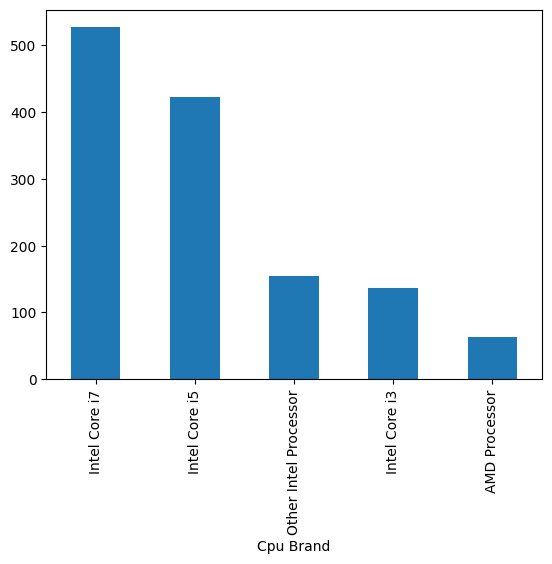

In [479]:
df['Cpu Brand'].value_counts().plot(kind='bar')

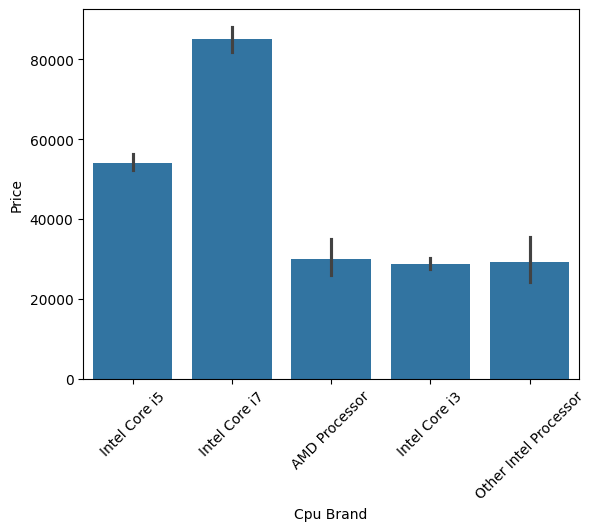

In [480]:
sns.barplot(x=df['Cpu Brand'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [481]:
df.drop(columns=['Cpu', 'Cpu Name'], inplace=True)

In [482]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

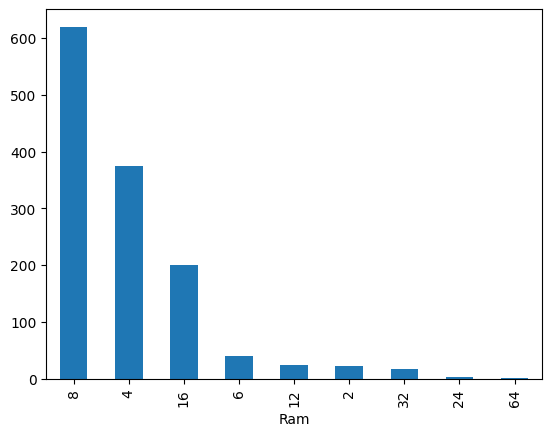

In [483]:
df['Ram'].value_counts().plot(kind='bar')

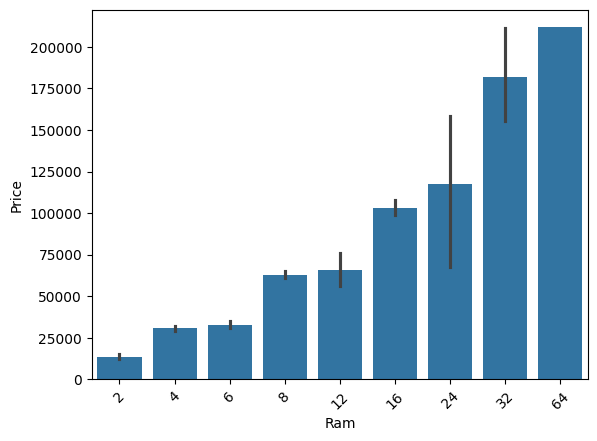

In [484]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

Seems as RAM increases, Price Increases in a linear manner

In [485]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [486]:
# Convert 'Memory' column to string and clean it
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Split 'Memory' into two parts based on '+'
new = df["Memory"].str.split("+", n=1, expand=True)

# Extract the first part and remove any leading/trailing whitespace
df["first"] = new[0]
df["first"] = df["first"].str.strip()

# Check if 'HDD', 'SSD', 'Hybrid', and 'Flash Storage' exist in 'first' and create binary columns
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in str(x) else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in str(x) else 0)
df["Layer1Hybrid"] = df["first"].apply(
    lambda x: 1 if "Hybrid" in str(x) else 0)
df["Layer1Flash_Storage"] = df["first"].apply(
    lambda x: 1 if "Flash Storage" in str(x) else 0)

# Extract the numeric part from 'first' and convert it to float
df['first'] = df['first'].str.extract('(\d+)').astype(float)

# Extract the second part from the split and fill any NaN values with '0'
df["second"] = new[1]
df["second"].fillna("0", inplace=True)

# Check if 'HDD', 'SSD', 'Hybrid', and 'Flash Storage' exist in 'second' and create binary columns
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in str(x) else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in str(x) else 0)
df["Layer2Hybrid"] = df["second"].apply(
    lambda x: 1 if "Hybrid" in str(x) else 0)
df["Layer2Flash_Storage"] = df["second"].apply(
    lambda x: 1 if "Flash Storage" in str(x) else 0)

# Extract the numeric part from 'second' and convert it to float
df['second'] = df['second'].str.extract('(\d+)').astype(float)

# Calculate HDD, SSD, Hybrid, and Flash_Storage based on binary values and numeric parts
df["HDD"] = (df["first"] * df["Layer1HDD"] +
             df["second"] * df["Layer2HDD"]).astype(int)
df["SSD"] = (df["first"] * df["Layer1SSD"] +
             df["second"] * df["Layer2SSD"]).astype(int)
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] +
                df["second"] * df["Layer2Hybrid"]).astype(int)
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] +
                       df["second"] * df["Layer2Flash_Storage"]).astype(int)

# Drop the intermediate and binary columns
df.drop(columns=['first', 'second',
                 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
                 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)

In [487]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
666,Dell,Notebook,8,1000 HDD,Intel HD Graphics 620,Windows 10,2.06,50882.4000,0,0,141.211998,Intel Core i5,1000,0,0,0
84,Acer,Notebook,4,1000 HDD,AMD Radeon R5,Windows 10,2.10,21045.6000,0,0,100.454670,AMD Processor,1000,0,0,0
818,Dell,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,4.36,133467.4656,0,1,127.335675,Intel Core i7,1000,128,0,0
59,Asus,Notebook,4,256 SSD,Intel HD Graphics 520,Linux,2.00,22111.2000,0,0,141.211998,Intel Core i3,0,256,0,0
165,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.40,95850.7200,0,1,141.211998,Intel Core i7,1000,256,0,0


In [488]:
df.drop(columns=['Memory'], inplace=True)

In [489]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [490]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [491]:
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

In [492]:
df.sample(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD
1007,HP,Ultrabook,8,Intel HD Graphics 520,Windows 7,1.43,77202.72,0,0,157.350512,Intel Core i7,0,256
655,Toshiba,Notebook,8,Intel HD Graphics 620,Windows 10,2.00,56689.92,0,1,141.211998,Intel Core i5,500,0
882,Asus,Notebook,4,Intel HD Graphics 500,Windows 10,1.65,18541.44,0,0,111.141337,Other Intel Processor,0,0


In [493]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [494]:
df['GpuBrand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [495]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand
61,Dell,Ultrabook,8,Intel UHD Graphics 620,Windows 10,1.70,46833.1200,0,0,157.350512,Intel Core i5,0,256,Intel
839,Asus,Notebook,8,Intel HD Graphics 620,Windows 10,2.30,31435.2000,0,0,141.211998,Intel Core i5,128,0,Intel
408,Lenovo,Notebook,4,Intel HD Graphics 520,Windows 10,2.20,21791.5200,0,0,141.211998,Intel Core i3,500,0,Intel
1178,MSI,Gaming,16,Nvidia GeForce GTX 970M,Windows 10,1.91,114731.5536,0,0,141.211998,Intel Core i7,1000,128,Nvidia
158,Dell,2 in 1 Convertible,8,Intel UHD Graphics 620,Windows 10,1.56,55890.7200,1,0,141.211998,Intel Core i7,0,256,Intel


In [496]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [497]:
df=df[df['GpuBrand'] != 'ARM']

In [498]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

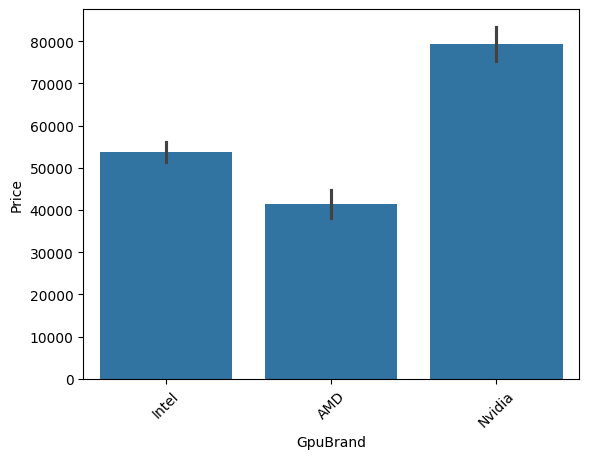

In [499]:
sns.barplot(x=df['GpuBrand'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [500]:
df.drop(columns=['Gpu'],inplace=True)

C:\Users\shash\AppData\Local\Temp\ipykernel_19788\1111925144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [501]:
df.sample(4)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand
372,Asus,Gaming,16,Windows 10,3.25,117162.720,0,1,127.335675,AMD Processor,1000,256,AMD
650,Asus,Gaming,32,Windows 10,3.80,149130.720,0,1,127.335675,Intel Core i7,0,512,Nvidia
301,Asus,Gaming,16,Windows 10,2.90,113060.160,0,0,127.335675,Intel Core i7,1000,256,Nvidia
791,Vero,Notebook,4,Windows 10,1.22,10810.512,0,0,157.350512,Other Intel Processor,0,0,Intel


In [502]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

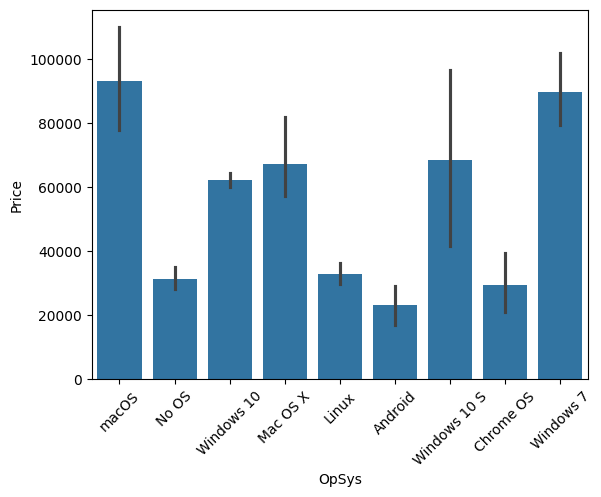

In [503]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [504]:
def categorizeOS(op):
    if op == 'Windows 10' or op  == 'Windows 7' or op == 'Windows 10 S':
        return 'Windows'
    elif op == 'macOS' or op == 'Mac OS X':
        return 'Mac'
    else:
        return 'Linux/ChromeOS/Others'

In [505]:
df['os'] = df['OpSys'].apply(categorizeOS)

C:\Users\shash\AppData\Local\Temp\ipykernel_19788\2303965691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(categorizeOS)


In [506]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
301,Asus,Gaming,16,Windows 10,2.900,113060.160,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows
512,Dell,Notebook,8,Windows 10,2.180,44542.080,0,0,141.211998,Intel Core i5,1000,0,Intel,Windows
593,Samsung,Notebook,16,Windows 10,2.500,90522.720,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
820,Lenovo,Notebook,4,Windows 10,2.100,26101.872,0,0,100.454670,Intel Core i3,500,0,Intel,Windows
104,Microsoft,Ultrabook,8,Windows 10 S,1.252,71395.200,1,0,200.842560,Intel Core i5,0,256,Intel,Windows


In [507]:
df.drop(columns=['OpSys'],inplace=True)

C:\Users\shash\AppData\Local\Temp\ipykernel_19788\3105339334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


In [508]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


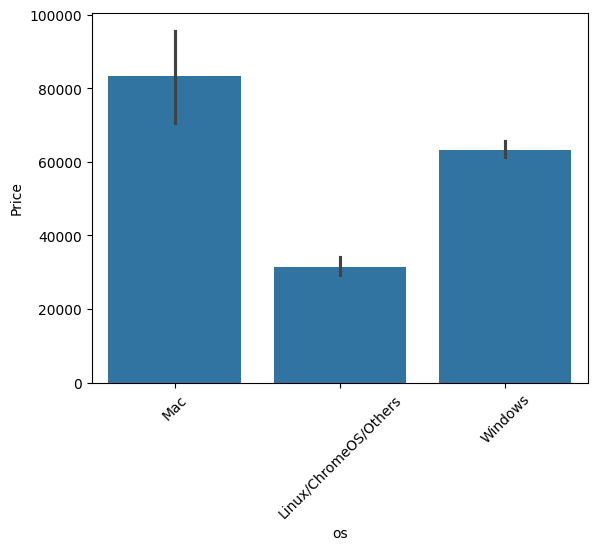

In [509]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

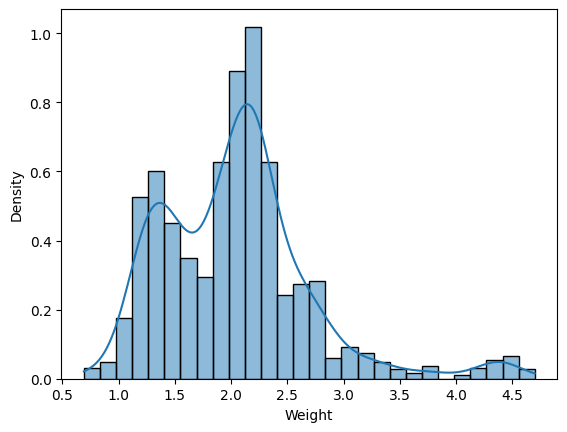

In [510]:
sns.histplot(df['Weight'], kde=True, stat='density')

<Axes: xlabel='Weight', ylabel='Price'>

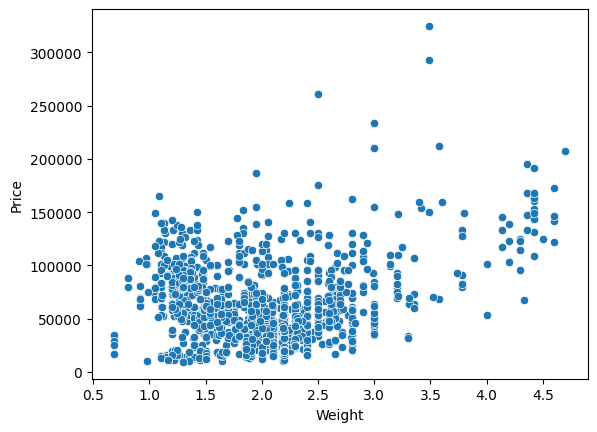

In [511]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [512]:
df.corr(numeric_only=True)

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


<Axes: >

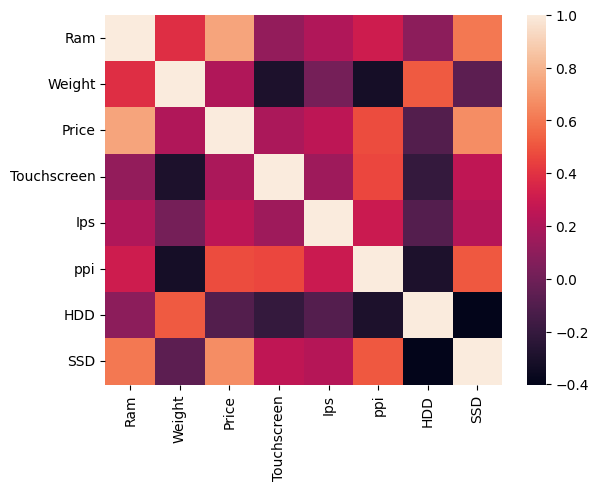

In [513]:
# Red means strongest correlation and white means extremely weak correlation
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='Price', ylabel='Density'>

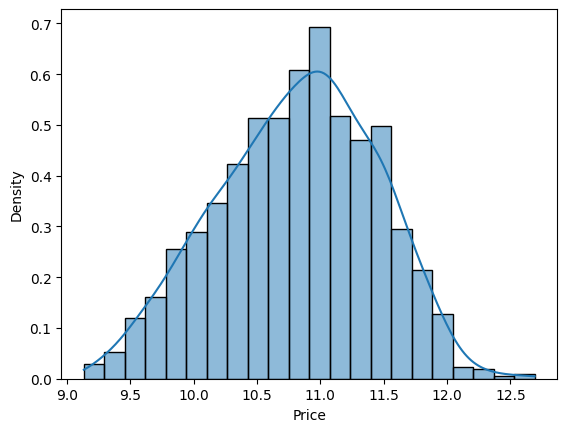

In [514]:
sns.histplot(np.log(df['Price']), kde=True, stat='density')

In [515]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [516]:
x.sample(5)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
120,Acer,Notebook,6,2.10,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
85,Dell,Gaming,16,2.65,0,1,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1174,Lenovo,Notebook,8,2.20,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Linux/ChromeOS/Others
590,Asus,2 in 1 Convertible,8,2.20,1,0,100.454670,Intel Core i5,1000,0,Intel,Windows
1065,Dell,Ultrabook,8,1.29,0,0,165.632118,Intel Core i7,0,256,Intel,Windows


In [517]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

### Model Training

In [518]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, random_state=2)

In [519]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Linux/ChromeOS/Others
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Linux/ChromeOS/Others


In [520]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [521]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [522]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


| Description       | Number | Description       | Number |
| ----------------- | ------ | ----------------- | ------ |
| Company           | 0      | ppi               | 6      |
| TypeName          | 1      | Cpu Brand         | 7      |
| Ram               | 2      | HDD               | 8      |
| Weight            | 3      | SSD               | 9      |
| Touchscreen       | 4      | Gpu Brand         | 10     |
| Ips               | 5      | os                | 11     |


In [523]:
# Define the transformers for specific columns
transformers = [
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
]

#### Multiple Linear Regression

Multiple Linear Regression is a statistical modeling technique that quantifies the linear relationship between a dependent variable and two or more independent variables, allowing for the prediction of the dependent variable based on a combination of these predictor variables. The equation forultiple linear regression can be expressed as:

$y = b + w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n$

Where:
- $y$ is the dependent variable
- $x_1, x_2, ..., x_n$ are the independent variables
- $b$ is the y-intercept
- $w_1, w_2, ..., w_n$ are the coefficients for each independent variable

The goal is to estimate the values of the coefficients that provide the best-fit hyperplane.


In [524]:
# Create the ColumnTransformer with 'passthrough' for other columns
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a LinearRegression model
step2 = LinearRegression()

# Create a pipeline that applies the ColumnTransformer and then the LinearRegression model
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)


R2 Score: 0.8073277448418663
Mean Absolute Error: 0.21017827976428632


#### Ridge Regression
A linear regression technique that adds a penalty term to the ordinary least squares (OLS) method, helping to mitigate multicollinearity and overfitting by regularizing the model. It achieves this by minimizing the sum of squared coefficients, discouraging the model from assigning excessively large values to its features.

In [525]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a Ridge regression model
step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8126380428568218
Mean Absolute Error: 0.2096038073700089


#### Lasso Regression
Lasso Regression, short for Least Absolute Shrinkage and Selection Operator, is a linear regression method that adds a penalty term to the ordinary least squares (OLS) cost function, promoting feature selection and mitigating overfitting by forcing some model coefficients to exactly zero. This results in a simpler and more interpretable model by automatically excluding less important features.

In [526]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a Lasso regression model
step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.807067147449281
Mean Absolute Error: 0.21137354814603151


#### k-Nearest Neighbors (k-NN)
The k-nearest neighbors algorithm is a supervised machine learning algorithm used for classification and regression tasks. It is a non-parametric method that makes predictions based on the similarity of the input data to its neighbors. The algorithm assumes that similar data points tend to have similar labels.

In [527]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a KNN regression model
step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.7963620316652673
Mean Absolute Error: 0.19924285560264074


#### Decision Tree
A decision tree is a flowchart-like structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents the outcome.

The concept behind decision trees is to split the dataset based on different attributes/features in such a way that the resulting subsets are as pure as possible. The purity of a subset refers to the homogeneity of the target variable within that subset. The goal is to minimize impurity and maximize information gain or Gini impurity (depending on the splitting criterion used).

In [528]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a Decision Tree Regressor model
step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8357550452985953
Mean Absolute Error: 0.18634784344121316


#### Support Vector Machine (SVM)
A powerful supervised machine learning algorithm used for classification and regression tasks. It works by finding a hyperplane in a high-dimensional space that best separates the data into different classes while maximizing the margin between the classes. SVM is effective for both linear and non-linear problems and is known for its ability to handle complex data and high-dimensional feature spaces.

In [529]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a SVM model
step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8072523491682381
Mean Absolute Error: 0.20249880424600672


#### Random Forest
An ensemble learning method that combines multiple decision trees to create a more robust and accurate predictive model. It works by constructing a forest of decision trees during training and averaging or voting on their predictions to improve the overall model's performance. Random Forest is widely used for classification and regression tasks and is known for its ability to handle high-dimensional data, reduce overfitting, and provide feature importance rankings.

In [540]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a Random Forest Regressor model
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8847383535528592
Mean Absolute Error: 0.16163135423776417


#### ExtraTrees

Extra Trees, short for Extremely Randomized Trees, is an ensemble learning method similar to Random Forest that builds multiple decision trees. However, it differs in the way it constructs individual trees by using randomization techniques to split nodes and reduce variance. Extra Trees is known for its computational efficiency and robustness against overfitting, making it suitable for various machine learning tasks, especially when dealing with high-dimensional data or noisy datasets.

In [541]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a ExtraTrees Regressor model
step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8826189087062304
Mean Absolute Error: 0.16425415402874108


#### Adaptive Boost (AdaBoost)
An ensemble learning technique that combines multiple weak learners (typically simple models) to create a strong predictive model. It iteratively adjusts the weights of training instances, emphasizing the misclassified data points in each iteration to improve the model's performance. AdaBoost is particularly effective for binary classification problems and is known for its ability to boost the accuracy of weak models by focusing on difficult-to-classify examples.

In [532]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a AdaBoost Regressor model
step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.7803177850537288
Mean Absolute Error: 0.23750978212397164


#### Gradient 
An ensemble learning method that builds a predictive model by combining the predictions of multiple weak models, such as decision trees, sequentially. It optimizes the model by minimizing the errors of the previous models, adjusting their weights, and adding new models in a gradient descent fashion, resulting in a strong predictive model with improved accuracy. Gradient Boosting is widely used for regression and classification tasks and is known for its robustness and capability to handle complex relationships in data.

In [533]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a AdaBoost Regressor model
step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8821560769550888
Mean Absolute Error: 0.15804513628597064


#### Extreme Gradient Boost (XGBoost)

A powerful and efficient machine learning algorithm that enhances the Gradient Boosting method. It is known for its speed and performance, utilizing techniques such as regularization, parallel processing, and tree pruning to optimize the boosting process. XGBoost is commonly used for a wide range of machine learning tasks, including regression, classification, and ranking, and has been a popular choice in various data science competitions and real-world applications due to its superior predictive accuracy and efficiency.

In [534]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a XGB Regressor model
step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)



R2 Score: 0.8837310647120712
Mean Absolute Error: 0.1606665636298157


#### Voting 
An ensemble machine learning method that combines the predictions of multiple regression models to make a final prediction. It aggregates the results by averaging the individual model predictions, resulting in a more robust and accurate regression model that can benefit from the diverse strengths of the combined models.

In [535]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Define individual regression models
rf = RandomForestRegressor(n_estimators=350, random_state=3,
                           max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)
et = ExtraTreesRegressor(n_estimators=100, random_state=3,
                         max_samples=0.5, max_features=0.75, max_depth=10, bootstrap=True)

# Create a Voting Regressor model that combines the individual models
# Adjusting weights for individual models in the ensemble to control their influence on the final prediction.
step2 = VotingRegressor(
    [('rf', rf), ('gbdt', gbdt), ('xgb', xgb), ('et', et)], weights=[5, 1, 1, 1])

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8893501115608962
Mean Absolute Error: 0.15949707610884933


#### Stacking
Also known as Stacked Generalization, is an ensemble learning technique that combines multiple machine learning models by training a meta-model on their predictions. It involves using a variety of base models to make predictions on the same dataset, and then a meta-model is trained on these base models' predictions to create a more powerful and accurate final model. Stacking is used to improve predictive performance and can handle complex relationships in the data by leveraging the strengths of different base models.

In [536]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Define individual regression models
rf = RandomForestRegressor(n_estimators=350, random_state=3,
                           max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)

# Create a Stacking Regressor model that combines the individual models
step2 = StackingRegressor(
    [('rf', rf), ('gbdt', gbdt), ('xgb', xgb)], final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8811602633434947
Mean Absolute Error: 0.16563424329881804
